In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
import torch
import pytorch3d.transforms.so3 as so3
from pytorch3d.transforms.so3 import (
    so3_exp_map,
    so3_relative_angle,
)
from pytorch3d.renderer.cameras import (
    SfMPerspectiveCameras,
)

# add path for demo utils
import sys
import os
sys.path.append(os.path.abspath(''))

# set for reproducibility
torch.manual_seed(42)

from utils import plot_camera_scene

In [58]:
log_R = torch.randn(1, 3, dtype=torch.float32)
R = so3_exp_map(log_R)
T = torch.tensor([[1,2,3]])

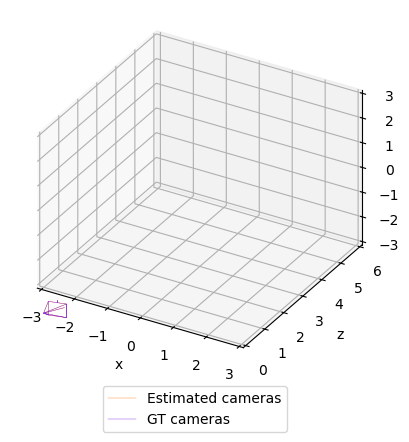

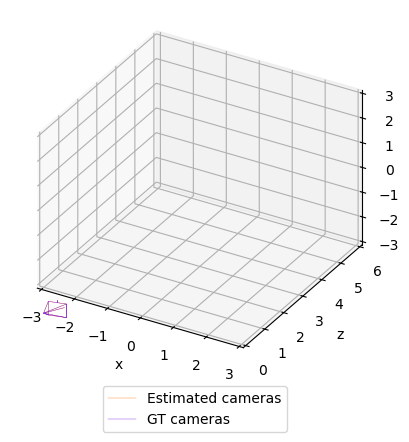

In [59]:
cam = SfMPerspectiveCameras(R=R, T=T)
plot_camera_scene(cam, cam, "")

In [34]:
M = cam.get_world_to_view_transform()
M.get_matrix()

tensor([[[ 0.4218,  0.0318, -0.9061,  0.0000],
         [-0.2626,  0.9608, -0.0886,  0.0000],
         [ 0.8678,  0.2753,  0.4137,  0.0000],
         [ 1.0000,  2.0000,  3.0000,  1.0000]]])

In [42]:
p_world = torch.tensor([[1, 0, 0]], dtype=torch.float32)
print(M.transform_points(p_world))

tensor([[1.4218, 2.0318, 2.0939]])


In [50]:
p_WH = torch.hstack([p_world, torch.ones((1,1))])
print(p_WH @ M.get_matrix())

tensor([[[1.4218, 2.0318, 2.0939, 1.0000]]])
